In [1]:
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

#Кластеризация
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.mixture import GaussianMixture


%matplotlib inline

# Парсинг

In [11]:
df = pd.read_csv('data/Data3/train_2.csv', delimiter=';', low_memory=False)
df

,ID,MM_IN_BANK,MM_W_CARD,AGE,GENDER,EDUCATION_LEVEL,MARITAL_STATUS,DEPENDANT_CNT,INCOME_MAIN_AMT,REG_CODE
0,500000000000003702,5,5,35,2,3,3,0,87000,9.0
1,500000000000004100,108,0,34,2,3,3,2,180000,31.0
2,500000000000004523,0,0,35,1,1,3,0,61000,38.0
3,500000000000004529,6,6,38,1,5,3,0,318000,42.0
4,500000000000004718,18,5,39,1,-1,3,0,34000,81.0
...,...,...,...,...,...,...,...,...,...,...
199995,500000004694875418,60,5,42,2,3,3,0,60000,62.0
199996,500000004694884558,19,0,37,2,-1,4,1,68000,40.0
199997,500000004694909288,33,3,44,2,1,1,2,58000,26.0
199998,500000004694952000,0,0,31,2,-1,-1,0,NaN,79.0


In [38]:
df1["SUM_TRANS"] = df1["SUM_TRANS"].astype(str).str.replace("<NA>", "0")

In [39]:
df1['SUM_TRANS'] = pd.to_numeric(df1['SUM_TRANS'], errors='coerce').astype('Int64')

In [40]:
df["d"] = df["ID"].map(df1.groupby("ID")["SUM_TRANS"].sum())

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103673 entries, 0 to 199999
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               103673 non-null  int64  
 1   MM_IN_BANK       103673 non-null  int64  
 2   MM_W_CARD        103673 non-null  int64  
 3   AGE              103673 non-null  int64  
 4   GENDER           103673 non-null  int64  
 5   EDUCATION_LEVEL  103673 non-null  int64  
 6   MARITAL_STATUS   103673 non-null  int64  
 7   DEPENDANT_CNT    103673 non-null  int64  
 8   INCOME_MAIN_AMT  103673 non-null  object 
 9   REG_CODE         103673 non-null  float64
 10  d                103673 non-null  Int64  
dtypes: Int64(1), float64(1), int64(8), object(1)
memory usage: 9.6+ MB


In [43]:
df

,ID,MM_IN_BANK,MM_W_CARD,AGE,GENDER,EDUCATION_LEVEL,MARITAL_STATUS,DEPENDANT_CNT,INCOME_MAIN_AMT,REG_CODE,d
0,500000000000003702,5,5,35,2,3,3,0,87000,9.0,31926
1,500000000000004100,108,0,34,2,3,3,2,180000,31.0,17746
2,500000000000004523,0,0,35,1,1,3,0,61000,38.0,6976
3,500000000000004529,6,6,38,1,5,3,0,318000,42.0,6159
4,500000000000004718,18,5,39,1,-1,3,0,34000,81.0,4841
...,...,...,...,...,...,...,...,...,...,...,...
199994,500000004694872697,25,3,40,1,-1,-1,0,30000,32.0,1009
199995,500000004694875418,60,5,42,2,3,3,0,60000,62.0,1516
199996,500000004694884558,19,0,37,2,-1,4,1,68000,40.0,6688
199997,500000004694909288,33,3,44,2,1,1,2,58000,26.0,35512


<AxesSubplot:>

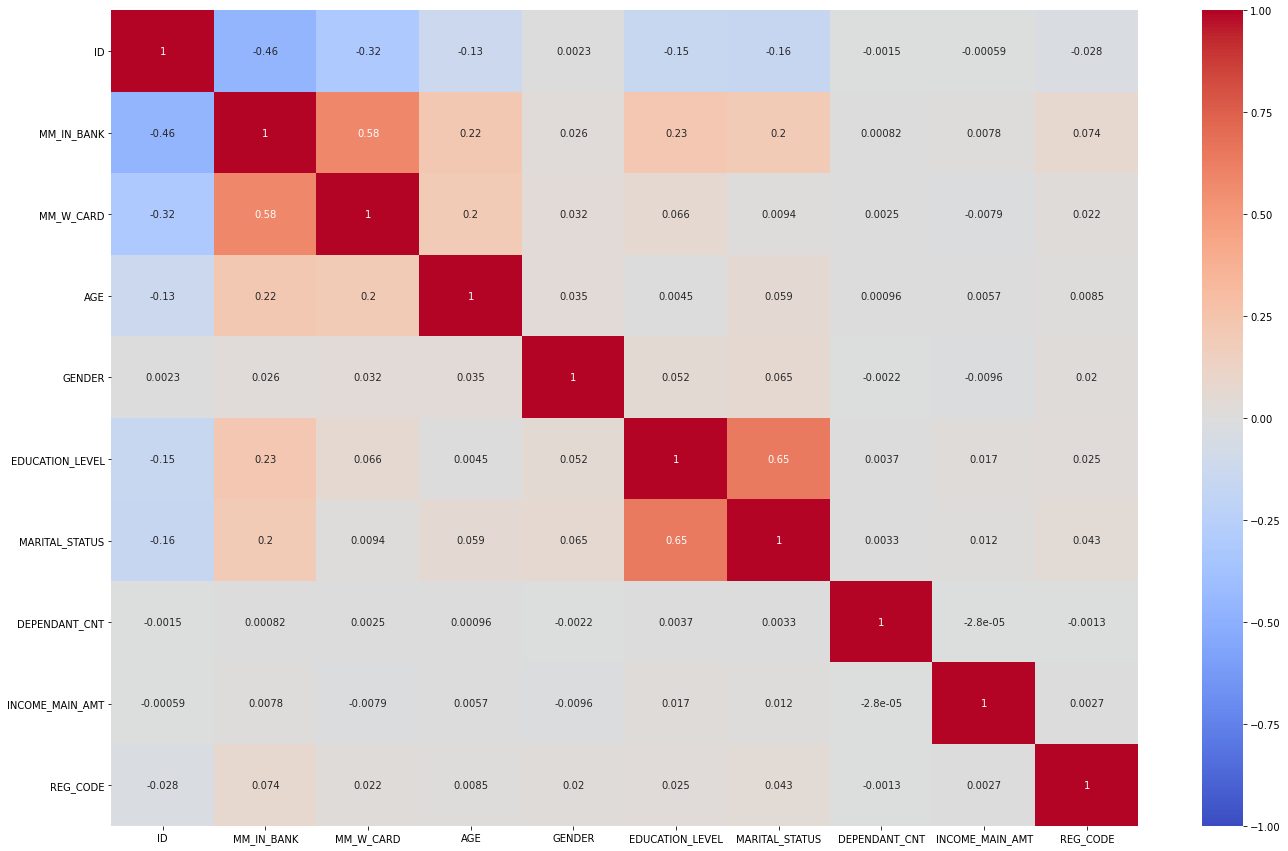

In [6]:
plt.figure(figsize=(23, 15))
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1,cmap= 'coolwarm')

In [ ]:
На корреляционной карте выше видно, что довольно сильно коррелируют между собой атрибуты:


In [39]:
df = df[['AGE', 'GENDER', 'EDUCATION_LEVEL', 'MARITAL_STATUS', 'INCOME_MAIN_AMT', 'REG_CODE', 'MM_W_CARD', 'MM_IN_BANK']]
df

,AGE,GENDER,EDUCATION_LEVEL,MARITAL_STATUS,INCOME_MAIN_AMT,REG_CODE,MM_W_CARD,MM_IN_BANK
0,35,2,3,3,87000.0,9.0,5,5
1,34,2,3,3,180000.0,31.0,0,108
2,35,1,1,3,61000.0,38.0,0,0
3,38,1,5,3,318000.0,42.0,6,6
4,39,1,-1,3,34000.0,81.0,5,18
...,...,...,...,...,...,...,...,...
199995,42,2,3,3,60000.0,62.0,5,60
199996,37,2,-1,4,68000.0,40.0,0,19
199997,44,2,1,1,58000.0,26.0,3,33
199998,31,2,-1,-1,NaN,79.0,0,0


# Предварительная обработка данных

In [8]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

<ipython-input-8-5110ff77c3d8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


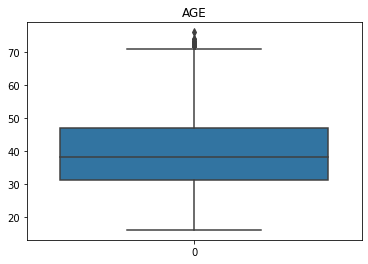

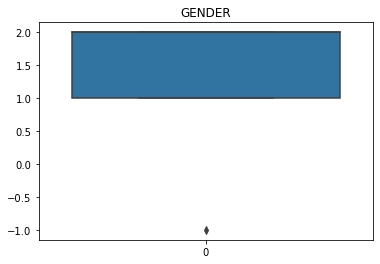

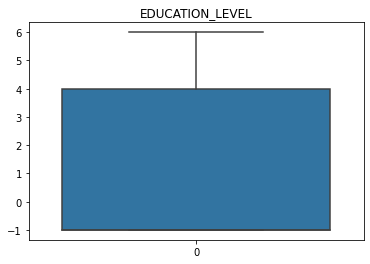

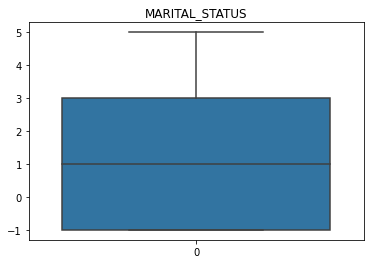

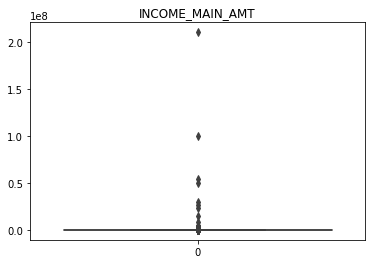

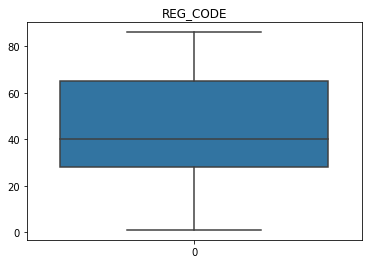

In [17]:
#Вывод коробчатых диаграм в цикле только по числовым атриубтам
for col in df.select_dtypes(exclude=["object", "datetime64[ns]"]).columns:
    #построение фигуры
    plt.figure()
    #Заголовк
    plt.title(col)
    #Вывод диаграммы
    sns.boxplot(data=df[col])
    plt.show()


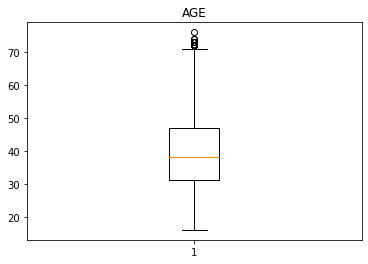

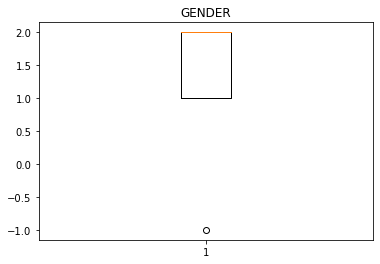

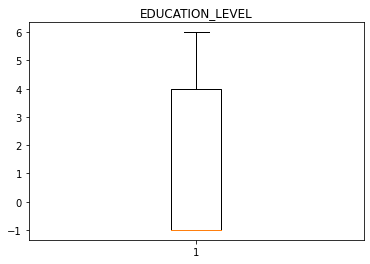

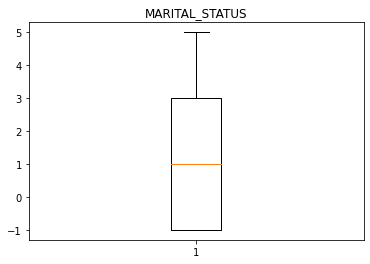

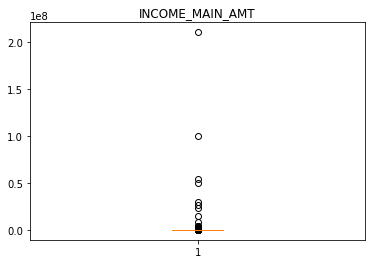

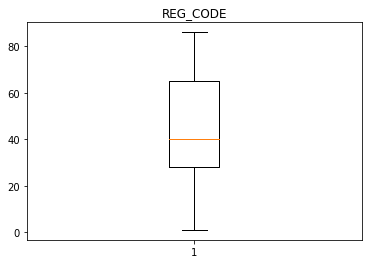

In [9]:
#Вывод коробчатых диаграм в цикле только по числовым атриубтам
for col in df.select_dtypes(exclude=["object", "datetime64[ns]"]).columns:
    #построение фигуры
    plt.figure()
    #Заголовк
    plt.title(col)
    #Вывод диаграммы
    plt.boxplot(df[col])
    plt.show()

У атрибута 'INCOME_MAIN_AMT' можно увидеть небольшое отклонение от того что было, но это уже приемлимо

# Формирование дополнительных атрибутов

In [40]:
### 1.4 Формирование дополнительных атрибутов

##Перевод из рублей в доллары

df['INCOME_MAIN_AMT_USD'] = df['INCOME_MAIN_AMT'].apply(lambda x: x / 80)

df

<ipython-input-40-cefea5795214>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['INCOME_MAIN_AMT_USD'] = df['INCOME_MAIN_AMT'].apply(lambda x: x / 80)


,AGE,GENDER,EDUCATION_LEVEL,MARITAL_STATUS,INCOME_MAIN_AMT,REG_CODE,MM_W_CARD,MM_IN_BANK,INCOME_MAIN_AMT_USD
0,35,2,3,3,87000.0,9.0,5,5,1087.5
1,34,2,3,3,180000.0,31.0,0,108,2250.0
2,35,1,1,3,61000.0,38.0,0,0,762.5
3,38,1,5,3,318000.0,42.0,6,6,3975.0
4,39,1,-1,3,34000.0,81.0,5,18,425.0
...,...,...,...,...,...,...,...,...,...
199995,42,2,3,3,60000.0,62.0,5,60,750.0
199996,37,2,-1,4,68000.0,40.0,0,19,850.0
199997,44,2,1,1,58000.0,26.0,3,33,725.0
199998,31,2,-1,-1,NaN,79.0,0,0,NaN


In [20]:
#Помещу их в переменную X
X = df[["AGE", "GENDER", "EDUCATION_LEVEL"]]

In [21]:
#Обьявляю метод главных компонент
pca = PCA(n_components=2)
#Применяю его на данных
X = pca.fit_transform(X)

In [22]:
#Настройка параметров
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
#Предсказание
kmpreds = kmeans.predict(X)
#Заношу кластеризированные метки в набор данных
df["KMCLUSTS"] = kmpreds

<ipython-input-22-6bc920a4c243>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["KMCLUSTS"] = kmpreds


In [ ]:
#https://pythonru.com/uroki/sklearn-kmeans-i-knn

In [ ]:
#https://digitrain.ru/articles/13812/

In [66]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
from sklearn.cluster import KMeans
blobs = df[['MM_W_CARD', 'MM_IN_BANK', 'GENDER']].head(1000)
colnames = list(blobs.columns[1:-1])


KeyError: "['GENDER'] not in index"

C:\Users\allmi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\allmi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


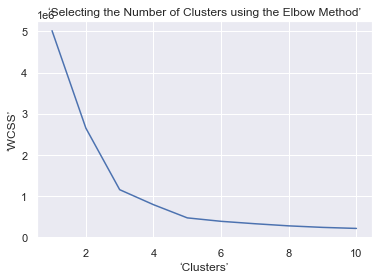

In [51]:
#Затем давайте определим входные данные, которые мы будем использовать для нашего алгоритма кластеризации KMeans. Воспользуемся возрастом и оценкой расходов:
X = blobs.copy()

#Следующее, что нам нужно сделать, это определить количество кластеров, которые мы будем использовать. Мы будем использовать метод локтя, который строит график суммы квадратов внутри кластера (WCSS) в зависимости от количества кластеров. Нам нужно определить цикл for, который содержит экземпляры класса KMeans. Этот цикл for будет перебирать номера кластеров с первого по 10. Мы также инициализируем список, который мы будем использовать для добавления значений WCSS:
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)

#Затем мы добавляем значения WCSS в наш список. Мы получаем доступ к этим значениям через атрибут инерции объекта KMeans:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

#Наконец, мы можем построить график зависимости WCSS от количества кластеров. Во-первых, давайте импортируем Matplotlib and Seaborn, который позволит нам создавать и форматировать визуализации данных:
sns.set()
plt.plot(range(1, 11), wcss)
plt.title('‘Selecting the Number of Clusters using the Elbow Method’')
plt.xlabel('‘Clusters’')
plt.ylabel('‘WCSS’')
plt.show()

# Модель гауссовой смеси (GMM)

In [52]:
from sklearn.mixture import GaussianMixture

In [53]:
#Затем давайте инициализируем экземпляр класса GaussianMixture. Давайте начнем с рассмотрения трех кластеров и подгоним модель к нашим входным данным (в данном случае возрасту и оценке расходов):
from sklearn.mixture import GaussianMixture
n_clusters = 3
gmm_model = GaussianMixture(n_components=n_clusters)
gmm_model.fit(X)

GaussianMixture(n_components=3)

In [63]:
cluster_labels = gmm_model.predict(X)
X = pd.DataFrame(X)
X['cluster'] = cluster_labels

ValueError: Expected the input data X have 3 features, but got 4 features

In [62]:
for k in range(0,n_clusters):
    data = X[X['cluster']==k]
    plt.scatter(df['MM_W_CARD'],df['MM_IN_BANK'],c=df['EDUCATION_LEVEL'].astype('category'))

KeyError: 'EDUCATION_LEVEL'

In [ ]:
plt.title(“Clusters Identified by Guassian Mixture Model”)
plt.ylabel(“Spending Score (1–100)”)
plt.xlabel(“Age”)
plt.show()

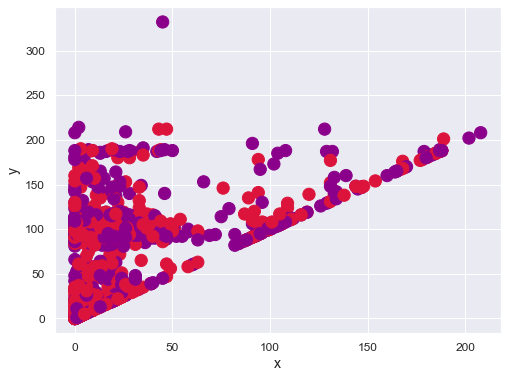

In [46]:
customcmap = ListedColormap(["crimson", "mediumblue", "darkmagenta"])

fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x=blobs['MM_W_CARD'], y=blobs['MM_IN_BANK'], s=150,
 c=blobs['GENDER'].astype('category'), 
 cmap = customcmap)
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Error for centroid 0: 3168400.00
Error for centroid 1: 566297209.00
Error for centroid 2: 34869025.00


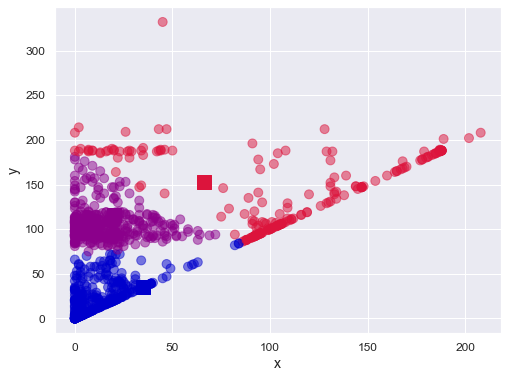

In [48]:
import numpy as np
def initiate_centroids(k, dset):
 '''
 Select k data points as centroids
 k: number of centroids
 dset: pandas dataframe
 '''
 centroids = dset.sample(k)
 return centroids

np.random.seed(42)
k=3
df = blobs[['MM_W_CARD','MM_IN_BANK']]
centroids = initiate_centroids(k, df)
centroids

def rsserr(a,b):
    '''
    Calculate the root of sum of squared errors. 
    a and b are numpy arrays
    '''
    return np.square(np.sum((a-b)**2)) 

for i, centroid in enumerate(range(centroids.shape[0])):
    err = rsserr(centroids.iloc[centroid,:], df.iloc[36,:])
    print('Error for centroid {0}: {1:.2f}'.format(i, err))

def centroid_assignation(dset, centroids):
    '''
    Given a dataframe `dset` and a set of `centroids`, we assign each
    data point in `dset` to a centroid. 
    - dset - pandas dataframe with observations
    - centroids - pa das dataframe with centroids
    '''
    k = centroids.shape[0]
    n = dset.shape[0]
    assignation = []
    assign_errors = []

    for obs in range(n):
        # Estimate error
        all_errors = np.array([])
        for centroid in range(k):
            err = rsserr(centroids.iloc[centroid, :], dset.iloc[obs,:])
            all_errors = np.append(all_errors, err)

        # Get the nearest centroid and the error
        nearest_centroid =  np.where(all_errors==np.amin(all_errors))[0].tolist()[0]
        nearest_centroid_error = np.amin(all_errors)

        # Add values to corresponding lists
        assignation.append(nearest_centroid)
        assign_errors.append(nearest_centroid_error)

    return assignation, assign_errors

df['centroid'], df['error'] = centroid_assignation(df, centroids)
df.head()

fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df.iloc[:,0], df.iloc[:,1],  marker = 'o', 
            c=df['centroid'].astype('category'), 
            cmap = customcmap, s=80, alpha=0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  
            marker = 's', s=200, c=[0, 1, 2], 
            cmap = customcmap)
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Парсинг и предобработка данных

In [5]:
#Загрузка библиотек
import pandas as pd
import numpy as np
from pprint import pprint
import codecs
import json
import glob
pd.set_option('display.max_columns', None)
from pandas import json_normalize

from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

In [6]:
#Получение имен файлов
path = 'data/Data3'
all_filenames = [i for i in glob.glob(path + '/*.{}'.format('csv'))]
print(len(all_filenames))

2


In [9]:
#Преобразование в DataFrame
df1 = pd.read_csv(all_filenames[0], delimiter=';')
df2 = pd.read_csv(all_filenames[1], delimiter=';')
df1.info()
df2.info()

C:\Users\allmi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\allmi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12845075 entries, 0 to 12845074
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   ID             int64 
 1   PROD_TYPE      int64 
 2   TRANS_DTTM     object
 3   MCC_CODE       int64 
 4   SUM_TRANS      object
 5   LOCATION_NAME  object
dtypes: int64(3), object(3)
memory usage: 588.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               200000 non-null  int64  
 1   MM_IN_BANK       200000 non-null  int64  
 2   MM_W_CARD        200000 non-null  int64  
 3   AGE              200000 non-null  int64  
 4   GENDER           200000 non-null  int64  
 5   EDUCATION_LEVEL  200000 non-null  int64  
 6   MARITAL_STATUS   200000 non-null  int64  
 7   DEPENDANT_CNT    200000 non-null  int64  
 8   INCOME_MAIN_AMT  103924 non-null

In [10]:
#Соединение в один DataFrame
df1 = pd.merge(df1, df2, how='left', on='ID').dropna()

In [ ]:
#Удаление выбросов
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
lowqe_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR
print(lowqe_bound,upper_bound)

df = df[~((df < lowqe_bound) |(df > upper_bound)).any(axis=1)]

C:\Users\allmi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AGE'>

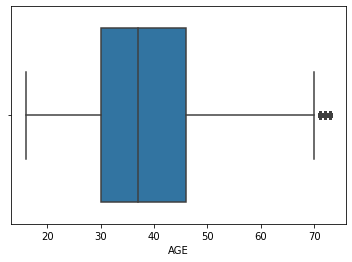

In [33]:
sns.boxplot(df['AGE'])

In [141]:
#Преобразование столбцов к числовым значениям
df['SUM_TRANS'] = pd.to_numeric(df['SUM_TRANS'], errors='coerce').astype('Int64')
df['REG_CODE'] = pd.to_numeric(df['REG_CODE'], errors='coerce').astype('Int64')
df['INCOME_MAIN_AMT'] = pd.to_numeric(df['INCOME_MAIN_AMT'], errors='coerce').astype('Int64')
df = df.dropna()

In [148]:
df.describe()

,ID,PROD_TYPE,MCC_CODE,SUM_TRANS,MM_IN_BANK,MM_W_CARD,AGE,GENDER,EDUCATION_LEVEL,MARITAL_STATUS,DEPENDANT_CNT,INCOME_MAIN_AMT
count,1.688782e+06,1.688782e+06,1.688782e+06,1.688782e+06,1.688782e+06,1.688782e+06,1.688782e+06,1.688782e+06,1.688782e+06,1.688782e+06,1688782.0,1.688782e+06
mean,5.000000e+17,1.816643e+00,5.580249e+03,8.870300e+02,3.497032e+01,1.150618e+01,3.830284e+01,1.434261e+00,-1.820495e-01,2.302517e-01,0.0,7.784017e+04
std,7.103861e+08,3.869590e-01,3.130378e+02,3.474182e+03,3.207368e+01,1.058987e+01,1.102073e+01,4.956598e-01,1.473545e+00,1.740553e+00,0.0,2.091462e+05
min,5.000000e+17,1.000000e+00,4.812000e+03,1.000000e+00,0.000000e+00,0.000000e+00,1.600000e+01,1.000000e+00,-1.000000e+00,-1.000000e+00,0.0,0.000000e+00
25%,5.000000e+17,2.000000e+00,5.411000e+03,1.490000e+02,1.000000e+01,2.000000e+00,3.000000e+01,1.000000e+00,-1.000000e+00,-1.000000e+00,0.0,3.000000e+04
50%,5.000000e+17,2.000000e+00,5.541000e+03,3.120000e+02,2.300000e+01,9.000000e+00,3.700000e+01,1.000000e+00,-1.000000e+00,-1.000000e+00,0.0,5.000000e+04
75%,5.000000e+17,2.000000e+00,5.814000e+03,7.100000e+02,5.000000e+01,1.900000e+01,4.600000e+01,2.000000e+00,1.000000e+00,1.000000e+00,0.0,8.200000e+04
max,5.000000e+17,2.000000e+00,5.999000e+03,7.915000e+05,1.240000e+02,5.000000e+01,7.300000e+01,2.000000e+00,4.000000e+00,5.000000e+00,0.0,5.400000e+07


<AxesSubplot:>

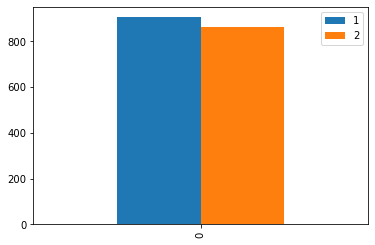

In [11]:
t = df[df['GENDER'] ==  1]['SUM_TRANS'].mean()
t0 = df[df['GENDER'] ==  2]['SUM_TRANS'].mean()
tete = pd.DataFrame({'1':t,'2':t0}, index=[0])
tete.plot.bar()

In [139]:
df

,ID,PROD_TYPE,TRANS_DTTM,MCC_CODE,SUM_TRANS,LOCATION_NAME,MM_IN_BANK,MM_W_CARD,AGE,GENDER,EDUCATION_LEVEL,MARITAL_STATUS,DEPENDANT_CNT,INCOME_MAIN_AMT,REG_CODE
5,500000000158893444,2,20.10.2021 21:18:28,5411,"2698,93",VERNYJ 1520\24 MOSKOVSKAYA STR\STUPINO\142800 ...,24,2,28,2,-1,-1,0,78000.0,32.0
6,500000000634517647,2,22.07.2021 17:02:59,5814,"299,94",VN B.MOSKOVS 54\54 BOLSHAYA MOSKOVSKAYA STR\VE...,17,13,45,2,3,5,0,60000.0,36.0
12,500000000161644967,2,18.10.2021 17:43:08,5411,"733,17",PYATEROCHKA 178\7 K1 ANGELOV PER\MOSCOW\12536...,0,0,28,1,-1,-1,0,174000.0,29.0
21,500000002429690949,2,02.08.2021 11:51:29,5814,44,KAVKAZSKAYA KUKHNYA\280 V LAZO STR\BIKIN\68000...,7,1,33,1,5,3,0,75000.0,79.0
22,500000000054395402,2,31.10.2021 16:51:21,5921,"568,52","KRUZHKA, UNIVERSITETSK\21 UNIVERSITETSKAYA STR...",22,21,29,1,5,3,0,49000.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2272469,500000000135296249,2,18.10.2021 19:34:29,5732,1096,PAROBAR VAPESHOP\BLD 16 VAJNERA STR\EKATERINBU...,28,0,21,1,-1,1,0,60000.0,68.0
2272479,500000000500347110,2,04.10.2021 11:57:35,5945,7820,"RICH FAMILY NSK\6 A, 1 OE MOCHISCHENSKOE\NOVOS...",20,20,41,1,-1,-1,0,70000.0,2.0
2272480,500000000052758339,2,13.10.2021 13:09:41,5399,1704,"YM*ozon\g. Moskva, naberezhnaya Presnenskay\g....",42,12,46,2,1,3,0,60000.0,62.0
2272483,500000001519793324,2,25.07.2021 13:14:47,5993,125,TABAK\58 LENINA\OKTYABRSKIJ\140050 RUSRUS,12,2,38,1,1,2,0,75000.0,32.0


In [212]:
ee = df.groupby(['REG_CODE']).mean()
ee['SUM_TRANS']

REG_CODE
1     1108.775369
2      1255.68601
3     1063.978261
4       1131.5585
5          1236.0
         ...     
82     917.529412
83    1352.840247
84    1610.634409
85    1470.210109
86     1284.87769
Name: SUM_TRANS, Length: 85, dtype: Float64

array([[<AxesSubplot:title={'center':'SUM_TRANS'}>]], dtype=object)

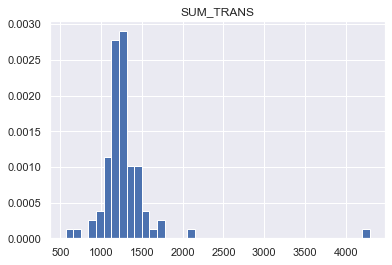

In [219]:
ee.hist(column='SUM_TRANS', bins=40, density=True)

<AxesSubplot:xlabel='REG_CODE'>

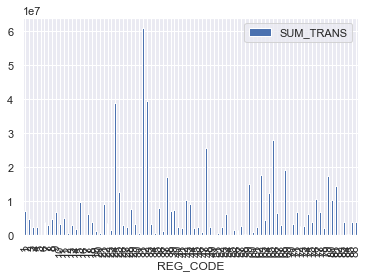

In [220]:
newdf = df[['REG_CODE','SUM_TRANS']].groupby('REG_CODE').sum()
newdf.plot(kind='bar')

In [221]:
newdf = df[['REG_CODE','SUM_TRANS']].groupby('GENDER').sum()
newdf.plot(kind='bar')

KeyError: 'GENDER'

<AxesSubplot:>

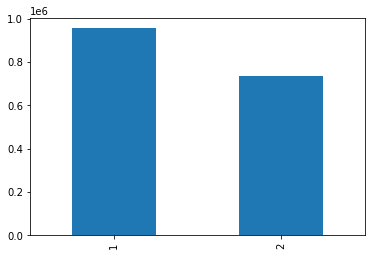

In [13]:
countries = df['GENDER'].value_counts()
countries.plot.bar()

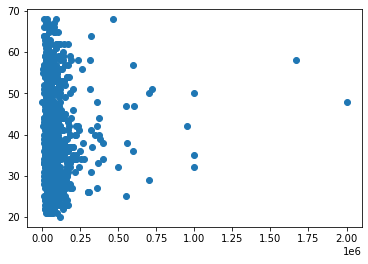

In [58]:
plt.scatter(x='INCOME_MAIN_AMT', y='AGE', data=df.head(1000))

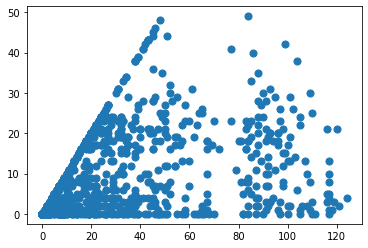

In [15]:
plt.scatter(x='MM_IN_BANK',y='MM_W_CARD', data=df.head(1000), s=50)

array([[<AxesSubplot:title={'center':'AGE'}>]], dtype=object)

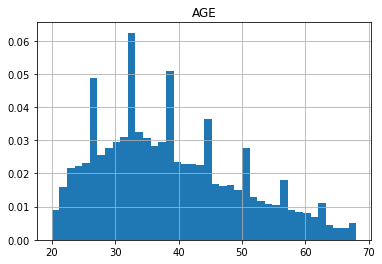

In [60]:
df.hist(column='MM_IN_BANK', bins=40, density=True)

<AxesSubplot:>

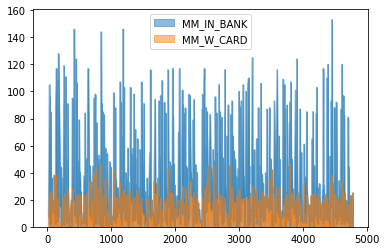

In [68]:
dfee = df[['MM_IN_BANK', 'MM_W_CARD']].head(1000)

dfee.plot.area(stacked=False)

# Кластеризация

https://www.dominodatalab.com/blog/getting-started-with-k-means-clustering-in-python

In [69]:
df_temp = df[['ID', 'PROD_TYPE', 'SUM_TRANS', 'MM_IN_BANK', 'MM_W_CARD', 'AGE', 'GENDER', 'INCOME_MAIN_AMT', 'REG_CODE']]

In [103]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
from sklearn.cluster import KMeans
blobs = df_temp
colnames = list(blobs.columns[1:-1])
blobs = blobs.head(1000)

In [132]:
df

,ID,PROD_TYPE,TRANS_DTTM,MCC_CODE,SUM_TRANS,LOCATION_NAME,MM_IN_BANK,MM_W_CARD,AGE,GENDER,EDUCATION_LEVEL,MARITAL_STATUS,DEPENDANT_CNT,INCOME_MAIN_AMT,REG_CODE
5,500000000158893444,2,20.10.2021 21:18:28,5411,"2698,93",VERNYJ 1520\24 MOSKOVSKAYA STR\STUPINO\142800 ...,24,2,28,2,-1,-1,0,78000.0,32.0
6,500000000634517647,2,22.07.2021 17:02:59,5814,"299,94",VN B.MOSKOVS 54\54 BOLSHAYA MOSKOVSKAYA STR\VE...,17,13,45,2,3,5,0,60000.0,36.0
12,500000000161644967,2,18.10.2021 17:43:08,5411,"733,17",PYATEROCHKA 178\7 K1 ANGELOV PER\MOSCOW\12536...,0,0,28,1,-1,-1,0,174000.0,29.0
21,500000002429690949,2,02.08.2021 11:51:29,5814,44,KAVKAZSKAYA KUKHNYA\280 V LAZO STR\BIKIN\68000...,7,1,33,1,5,3,0,75000.0,79.0
22,500000000054395402,2,31.10.2021 16:51:21,5921,"568,52","KRUZHKA, UNIVERSITETSK\21 UNIVERSITETSKAYA STR...",22,21,29,1,5,3,0,49000.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2272469,500000000135296249,2,18.10.2021 19:34:29,5732,1096,PAROBAR VAPESHOP\BLD 16 VAJNERA STR\EKATERINBU...,28,0,21,1,-1,1,0,60000.0,68.0
2272479,500000000500347110,2,04.10.2021 11:57:35,5945,7820,"RICH FAMILY NSK\6 A, 1 OE MOCHISCHENSKOE\NOVOS...",20,20,41,1,-1,-1,0,70000.0,2.0
2272480,500000000052758339,2,13.10.2021 13:09:41,5399,1704,"YM*ozon\g. Moskva, naberezhnaya Presnenskay\g....",42,12,46,2,1,3,0,60000.0,62.0
2272483,500000001519793324,2,25.07.2021 13:14:47,5993,125,TABAK\58 LENINA\OKTYABRSKIJ\140050 RUSRUS,12,2,38,1,1,2,0,75000.0,32.0


In [123]:
X = df[['MM_W_CARD', 'AGE']].copy()
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

sns.set()
plt.plot(range(1, 11), wcss)

In [124]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)

C:\Users\allmi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [126]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\allmi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


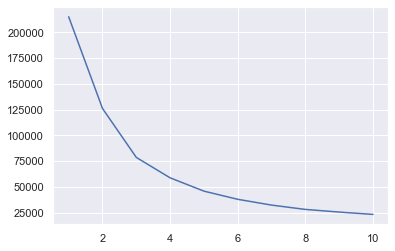

In [127]:
sns.set()
plt.plot(range(1, 11), wcss)

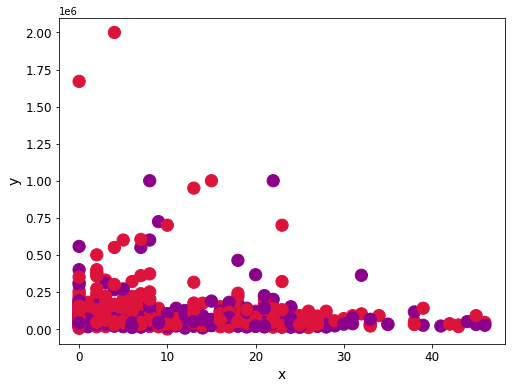

In [105]:
customcmap = ListedColormap(["crimson", "mediumblue", "darkmagenta"])

fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x=blobs['MM_W_CARD'], y=blobs['INCOME_MAIN_AMT'], s=150,
 c=blobs['GENDER'].astype('category'), 
 cmap = customcmap)
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

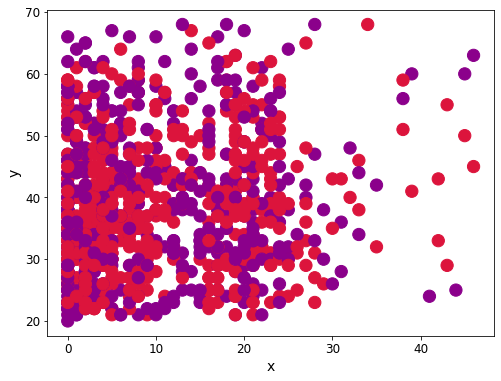

In [106]:
customcmap = ListedColormap(["crimson", "mediumblue", "darkmagenta"])

fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x=blobs['MM_W_CARD'], y=blobs['AGE'], s=150,
 c=blobs['GENDER'].astype('category'), 
 cmap = customcmap)
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

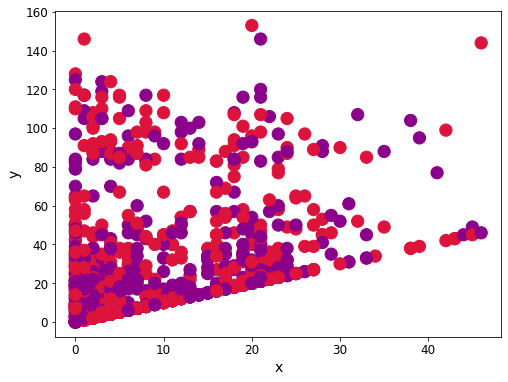

In [109]:
customcmap = ListedColormap(["crimson", "mediumblue", "darkmagenta"])

fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x=blobs['MM_W_CARD'], y=blobs['MM_IN_BANK'], s=150,
 c=blobs['GENDER'].astype('category'), 
 cmap = customcmap)
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [110]:
def initiate_centroids(k, dset):
 '''
 Select k data points as centroids
 k: number of centroids
 dset: pandas dataframe
 '''
 centroids = dset.sample(k)
 return centroids

np.random.seed(42)
k=3
df = blobs[['MM_W_CARD','AGE']]
centroids = initiate_centroids(k, df)
centroids

,MM_W_CARD,AGE
2490,12,33
3567,0,34
3605,2,33


In [111]:
def rsserr(a,b):
    '''
    Calculate the root of sum of squared errors. 
    a and b are numpy arrays
    '''
    return np.square(np.sum((a-b)**2)) 

In [112]:
for i, centroid in enumerate(range(centroids.shape[0])):
    err = rsserr(centroids.iloc[centroid,:], df.iloc[36,:])
    print('Error for centroid {0}: {1:.2f}'.format(i, err))

Error for centroid 0: 20736.00
Error for centroid 1: 1.00
Error for centroid 2: 16.00


In [113]:
def centroid_assignation(dset, centroids):
    '''
    Given a dataframe `dset` and a set of `centroids`, we assign each
    data point in `dset` to a centroid. 
    - dset - pandas dataframe with observations
    - centroids - pa das dataframe with centroids
    '''
    k = centroids.shape[0]
    n = dset.shape[0]
    assignation = []
    assign_errors = []

    for obs in range(n):
        # Estimate error
        all_errors = np.array([])
        for centroid in range(k):
            err = rsserr(centroids.iloc[centroid, :], dset.iloc[obs,:])
            all_errors = np.append(all_errors, err)

        # Get the nearest centroid and the error
        nearest_centroid =  np.where(all_errors==np.amin(all_errors))[0].tolist()[0]
        nearest_centroid_error = np.amin(all_errors)

        # Add values to corresponding lists
        assignation.append(nearest_centroid)
        assign_errors.append(nearest_centroid_error)

    return assignation, assign_errors

In [114]:
df['centroid'], df['error'] = centroid_assignation(df, centroids)
df.head()

<ipython-input-114-e891e7f5dc1a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['centroid'], df['error'] = centroid_assignation(df, centroids)


,MM_W_CARD,AGE,centroid,error
21,1,33,2,1.0
37,24,53,0,295936.0
42,17,34,0,676.0
44,20,37,0,6400.0
50,2,52,1,107584.0


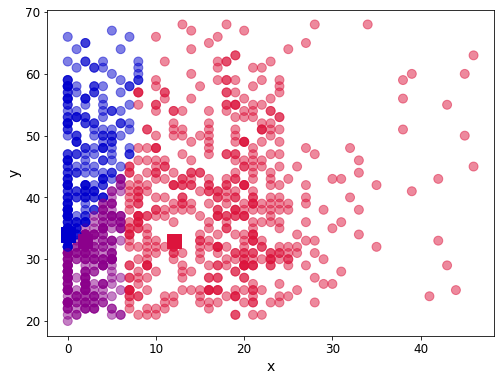

In [115]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df.iloc[:,0], df.iloc[:,1],  marker = 'o', 
            c=df['centroid'].astype('category'), 
            cmap = customcmap, s=80, alpha=0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  
            marker = 's', s=200, c=[0, 1, 2], 
            cmap = customcmap)
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [116]:
print("The total error is {0:.2f}".format(df['error'].sum()))

The total error is 115025074.00


In [ ]:
from sklearn.preprocessing import StandardScaler

raw_data = df[["AGE", "SUM_TRANS", "REG_CODE"]]

scaler = StandardScaler()

scaler.fit(raw_data)

scaled_features = scaler.transform(X)

scaled_features = scaler.transform(raw_data)

scaled_data = pd.DataFrame(scaled_features, columns = raw_data.columns)